<a href="https://colab.research.google.com/github/mrzaid/ml-bootcamp/blob/main/spam_email_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df=df[['v1','v2']]

In [7]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df=df.rename(columns={"v1": "target" ,"v2":"Input"})

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df["target"])

In [11]:
df.isnull().sum()

target    0
Input     0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
piedf=df['target'].value_counts()

([<matplotlib.patches.Wedge at 0x7fec0254e9d0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

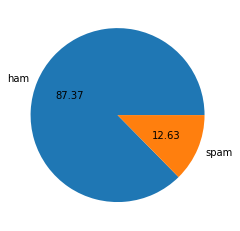

In [16]:
import matplotlib.pyplot as plt
plt.pie(piedf,labels=['ham','spam'],autopct="%.2f")

In [17]:
 !pip install nltk
 import nltk
 nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
df['num_characters']=df['Input'].apply(len)

In [19]:
df

,target,Input,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
df['num_words']=df['Input'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sent']=df['Input'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df

,target,Input,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [22]:
df[['num_words','num_characters','num_sent']].describe()

,num_words,num_characters,num_sent
count,5169.000000,5169.000000,5169.000000
mean,18.455794,78.977945,1.965564
std,13.324758,58.236293,1.448541
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,38.000000


In [23]:
df[df['target']==0][['num_words','num_characters','num_sent']].describe()


,num_words,num_characters,num_sent
count,4516.000000,4516.000000,4516.000000
mean,17.123782,70.459256,1.820195
std,13.493970,56.358207,1.383657
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,38.000000


In [24]:
df[df['target']==1][['num_words','num_characters','num_sent']].describe()

,num_words,num_characters,num_sent
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.970904
std,7.008418,30.137753,1.488425
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


In [25]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

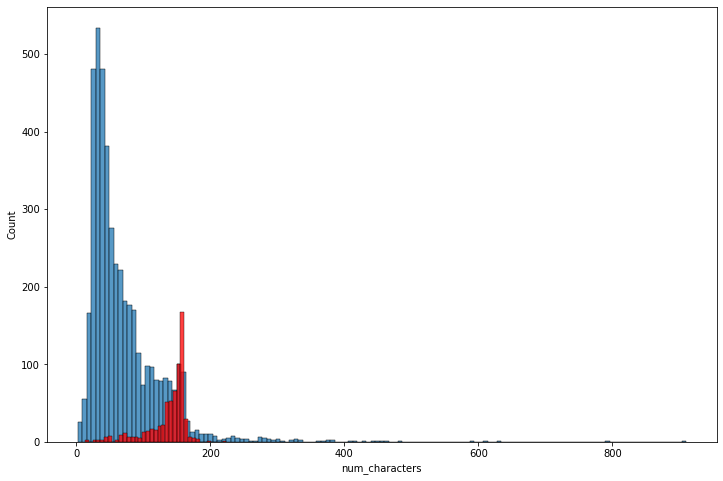

In [26]:
plt.figure(figsize=[12,8])
sns.histplot(df[df['target']==0]["num_characters"])
sns.histplot(df[df['target']==1]["num_characters"],color="red")

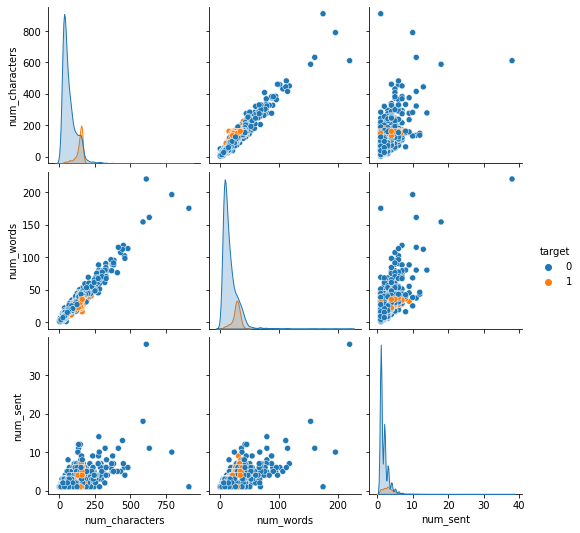

In [27]:
sns.pairplot(df,hue='target')

<Axes: >

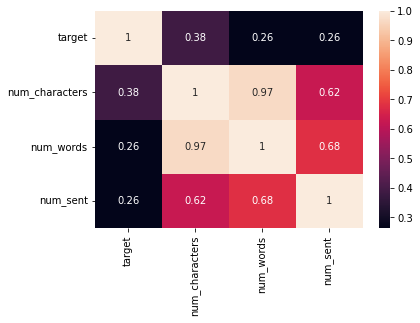

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
def transform_text(text):
   text=text.lower()
   text=nltk.word_tokenize(text)
   y=[] 
   for i in text:
     if i.isalnum():
        y.append(i)    
   stop_words = set(stopwords.words('english'))
   filtered_tokens=[word for word in y if word not in stop_words and string.punctuation]
   filterest_maal=[]
   for i in filtered_tokens:
     filterest_maal.append(ps.stem(i))
  #  return filtered_tokens 
   return " ".join(filterest_maal) 

In [30]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
transform_text('is ki naraa thou that machine learning loving hai yaara zaida $$ %$# %$#%$ . rter '""    )

'ki naraa thou machin learn love hai yaara zaida rter'

In [32]:
df['transformed_text']=df['Input'].apply(transform_text)

In [33]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [34]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

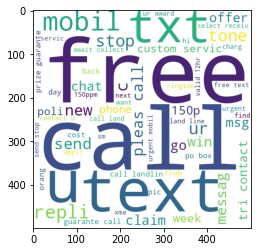

In [35]:
plt.imshow(spam_wc)

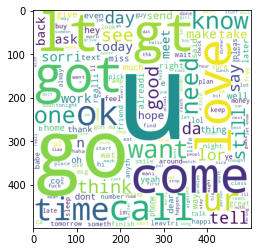

In [36]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

In [37]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

9939

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=TfidfVectorizer(max_features=3000)

In [66]:
x=cv.fit_transform(df['transformed_text']).toarray()
y=df['target'].values

In [58]:
# from sklearn.preprocessing import Normalizer
# scaler=Normalizer()
# x=scaler.fit_transform(x)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [67]:
mnb=MultinomialNB()
model=mnb.fit(x_train,y_train)

In [68]:
y_pred=model.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
